# Introduction

In this part, an attempt is made to perform a supervised learning algorithmn where the model is going to be trained on a labeled dataset where both the 'X' and the 'Y' variables are defined. Hence, using this mapping from predictors to the target variable, we use Decision Tree and Random Forest as a regressor here. The exploration of sk-learn libraries is used for the modelling and hyperparameter tuning with GridSearch CV and RandomisedSearchCV. Although economic data has the time component and seasonal affects associated with it, here an attempt is made to understand if the fiscal and monetary data points can indeed predict GDP or not, especially with the data of the developing nations with high variance in economic performance. 

# Decision Trees - Regressor

Though mostly decision trees are used for classfication tasks, they're well-equipped with regression too. Since regression involves the prediction of a continuous numerical value, it doesn't change the process of how the Decision Tree works. 

The splitting process begins at the root node and proceeds via a branched tree to a leaf node (terminal node) that carries the prediction or end outcome of the algorithm. Decision trees are typically built from the top down, with each step selecting a variable that best separates the set of objects. Each decision tree model sub-tree can be represented as a binary tree, with a decision node splitting into two nodes based on the circumstances.

Regression trees are decision trees in which the target variable or terminal node can take continuous values (usually real numbers).

Decision tree regression is advantageous for capturing complex relationships in data, handling non-linearity, and providing interpretable results. But it is also one of the algorithmns that can overfit very quickly and hence, one has to be cautious about overfitting, with deeper trees as they capture more noise through the training data.

In [59]:
# Importing revelant libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import  mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score, explained_variance_score
from tabulate import tabulate
from scipy.stats import uniform, poisson


Since we are going to focus on regression part of the data, I would like to explore the algorithmic progress of decision tree as a regressor. 

For the economic data, after removing the highly correlated values and after ensuring that the data is normalised, I wanted to see if on basis of the BRICS nations' data, how can the decisions be broken down as a tree.

For this dataset which is a merged dataframe, the 'year' column has been removed as I don't want to look into the predictions over time but more as a component that if this information is given, would it be able to capture the patterns of the data. Although I do understand that dropping the time component may prevent us from looking at the seasonality of the data and able to understand the events and shocks, for the regression and classification, I wanted to look more into understanding the dependancy of the data and the predictive power of decision tree.

The data uses GDP Growth (%) as the Y variable and the rest all of them as the X variables. The 'labels' dataset, since it is a self-defined variable is also excluded from the dataset.

In [89]:
# user defined function for calculating metrics

def calculate_metrics(x, y):
    rmse = np.sqrt(mean_squared_error(x, y))
    r2 = r2_score(x, y)
    mse = mean_squared_error(x, y)
    explained_var = explained_variance_score(x, y)
    
    return rmse , r2 * 100, mse  , explained_var * 100


In [60]:
stackeddf= pd.read_csv("../data/stackeddf.csv")

stackeddf.head(5)


,year,adj_NNI_g,adj_savings_fix_cap_GNI,adj_savings_edu_GNI,adj_NNS_GNI,ex_imp_growth,ex_debt_shocks,fdi_net_outflows,gdp_growth,short_term_debt_tot_reserves,lending_interest_rate,life_exp_birth,expense_gdp,military expenditure,labels
0,-1.647859,1.230366,0.270892,-0.277537,-0.052004,0.419580,-1.270470,-0.842531,1.595002,-0.032164,-0.845342,-0.112698,-0.121526,-0.167829,High Growth
1,-1.572340,-1.216110,0.313510,-0.277537,0.103127,-0.481153,-1.204634,-0.842808,1.304262,0.403253,-0.845342,-0.110878,-0.141348,-0.151690,High Growth
2,-1.496821,-0.510146,0.367195,-0.277537,0.049534,0.536099,-0.969857,-0.842942,0.295912,0.851964,-0.845342,-0.109081,-0.105898,-0.102821,Moderate Growth
3,-1.421301,1.160350,0.316780,-0.277537,0.046547,-0.495731,-0.889487,-0.842495,1.815392,1.403674,-0.845342,-0.107310,-0.098738,-0.109603,Very High Growth
4,-1.345782,-0.472199,0.362786,-0.277537,0.058430,0.726138,-0.708319,-0.842596,0.433390,1.517825,-0.845342,-0.105584,-0.034063,-0.080748,Moderate Growth


In [61]:

X= stackeddf.drop(['gdp_growth'], axis=1)
X= X.drop(['year'], axis=1)
X= X.drop(['labels'], axis=1)
Y= stackeddf['gdp_growth']

print(X.head(3))
print(Y.head(3))

   adj_NNI_g  adj_savings_fix_cap_GNI  adj_savings_edu_GNI  adj_NNS_GNI  \
0   1.230366                 0.270892            -0.277537    -0.052004   
1  -1.216110                 0.313510            -0.277537     0.103127   
2  -0.510146                 0.367195            -0.277537     0.049534   

   ex_imp_growth  ex_debt_shocks  fdi_net_outflows  \
0       0.419580       -1.270470         -0.842531   
1      -0.481153       -1.204634         -0.842808   
2       0.536099       -0.969857         -0.842942   

   short_term_debt_tot_reserves  lending_interest_rate  life_exp_birth  \
0                     -0.032164              -0.845342       -0.112698   
1                      0.403253              -0.845342       -0.110878   
2                      0.851964              -0.845342       -0.109081   

   expense_gdp  military expenditure  
0    -0.121526             -0.167829  
1    -0.141348             -0.151690  
2    -0.105898             -0.102821  
0    1.595002
1    1.304262
2

In [62]:

distribution = stackeddf['gdp_growth'].value_counts()
print(distribution.head(10))

gdp_growth
1.595002    5
1.929198    5
1.963597    5
2.122957    5
1.304262    5
2.068048    5
2.043121    5
0.426711    5
0.833160    5
0.441461    5
Name: count, dtype: int64


Since the target variable is numerical in nature, attempting to find out the class distrubution gives us only the information about how the dataset is distribution showing all the possibilities of GDP values.

## Baseline Decision Tree Regressor

To understand the basal performance of just the decision tree, a base model of decision tree without tuning any hyperparameters is introduced. 

In [63]:
X_train, X_temp, y_train, y_temp = train_test_split(X, Y, test_size=0.4, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


In [64]:
dt_regressor = DecisionTreeRegressor()
dt_regressor.fit(X_train, y_train)

DecisionTreeRegressor()

In [65]:
# predicting on train test
y_train_pred = dt_regressor.predict(X_train)

# prediction on test set 
y_test_pred = dt_regressor.predict(X_test)

# predicting on validation set
y_val_pred = dt_regressor.predict(X_val)



In [66]:
rmse_train1, r2_train1, mse_train1, explained_var_train1 = calculate_metrics(y_train, y_train_pred)
rmse_test1, r2_test1, mse_test1, explained_var_test1 = calculate_metrics(y_test, y_test_pred)
rmse_val1, r2_val1, mse_val1, explained_var_val1 = calculate_metrics(y_val, y_val_pred)


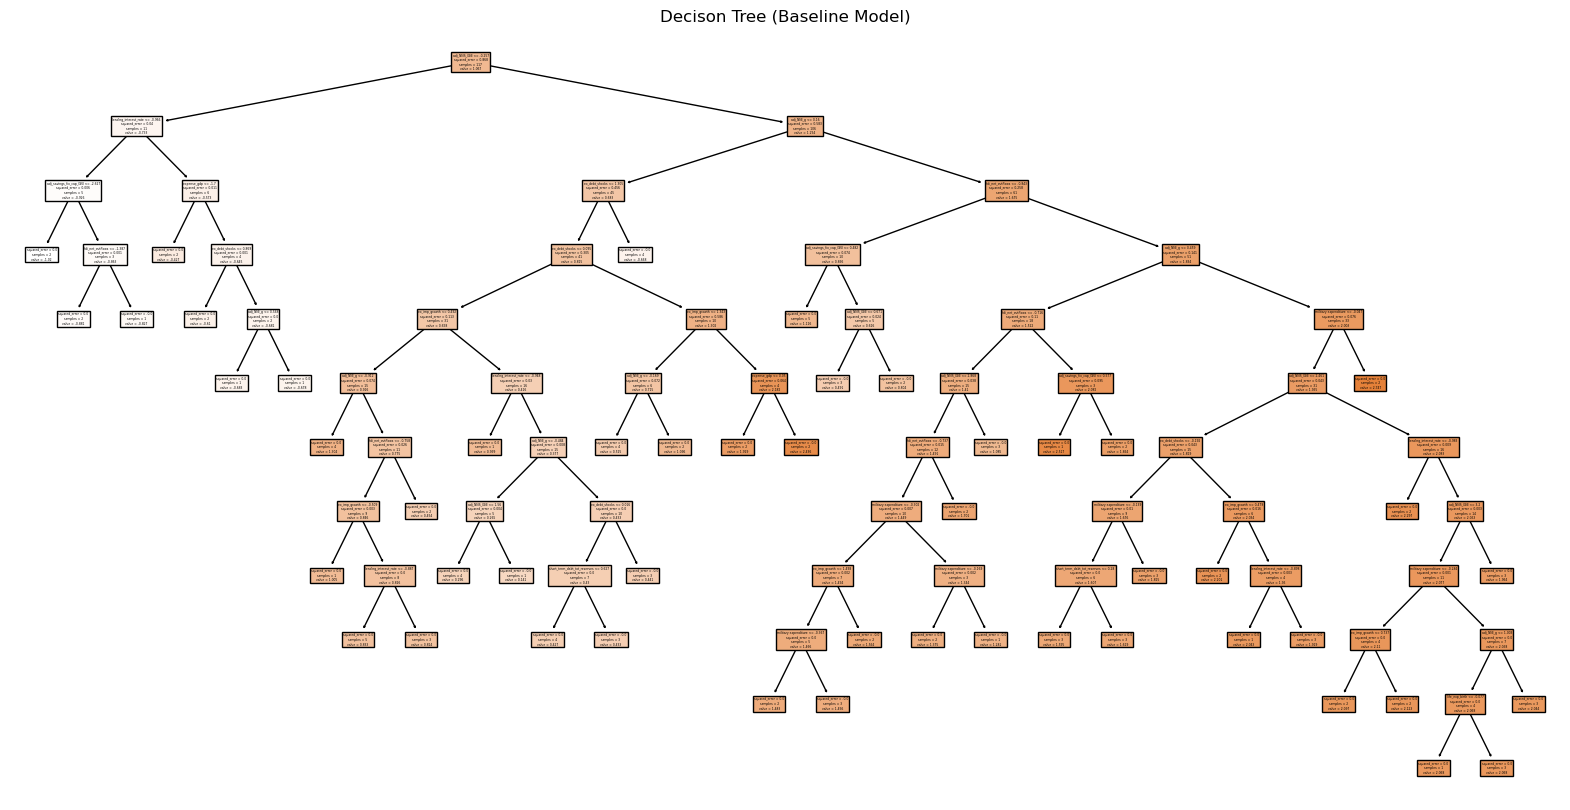

In [67]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20, 10))
plot_tree(dt_regressor, filled=True, feature_names=X.columns)
plt.title('Decison Tree (Baseline Model)')
plt.show()

This is a visual representation of the data. It makes sense also to understand why the basal tree is this huge as there is so much noise in the data since all the numerical variables are continous in nature and since most of the variables are usually correlated to each other. However, using the GridsearchCV and RandomisedSearchCV which are two hyperparameter tuning methods, we try to see if the tree can get pruned.

Hyperparameters are crucial settings that affect the performance of a model but are not learned from data.  As a result, hyperparameter adjustment is essential for improved model performance. 
GridSearchCV, or Grid Search Cross-Validation, streamlines the procedure of determining the best hyperparameters by searching exhaustively through a predetermined grid of possible values. Cross-validation is used to evaluate the model's performance across different sets of data, preventing overfitting. The technique computes a scoring metric for each hyperparameter combination and chooses the set that produces the best results. This method reduces the need for human experimentation, resulting in a more complete exploration of the hyperparameter space and improved model generalisation to new data. 

## Decision Tree Regressor : GridSearchCV

In [93]:

parameters = {'criterion':['squared_error','absolute_error'],
              'max_depth':np.arange(1,21).tolist()[0::2],
              'min_samples_split':np.arange(2,15).tolist()[0::2],
              'max_leaf_nodes':np.arange(3,26).tolist()[0::2]}

g2 = GridSearchCV(DecisionTreeRegressor(), parameters, cv=5)
g2.fit(X_train,y_train)

rgr_params1 = g2.best_params_
rgr_params1

{'criterion': 'squared_error',
 'max_depth': 15,
 'max_leaf_nodes': 17,
 'min_samples_split': 4}

In [69]:
# updated model
best_dt_regressor2 = DecisionTreeRegressor(**rgr_params1)

# fitting the model
best_dt_regressor2.fit(X_train, y_train)

# making the predictions on train, test and validation
y_train_pred2= best_dt_regressor2.predict(X_train)
y_test_pred2 = best_dt_regressor2.predict(X_test)
y_val_pred2 = best_dt_regressor2.predict(X_val)

# calculating the metrics
rmse_train2, r2_train2, mse_train2, explained_var_train2 = calculate_metrics(y_train, y_train_pred2)
rmse_test2, r2_test2, mse_test2, explained_var_test2 = calculate_metrics(y_test, y_test_pred2)
rmse_val2, r2_val2, mse_val2, explained_var_val2 = calculate_metrics(y_val, y_val_pred2)


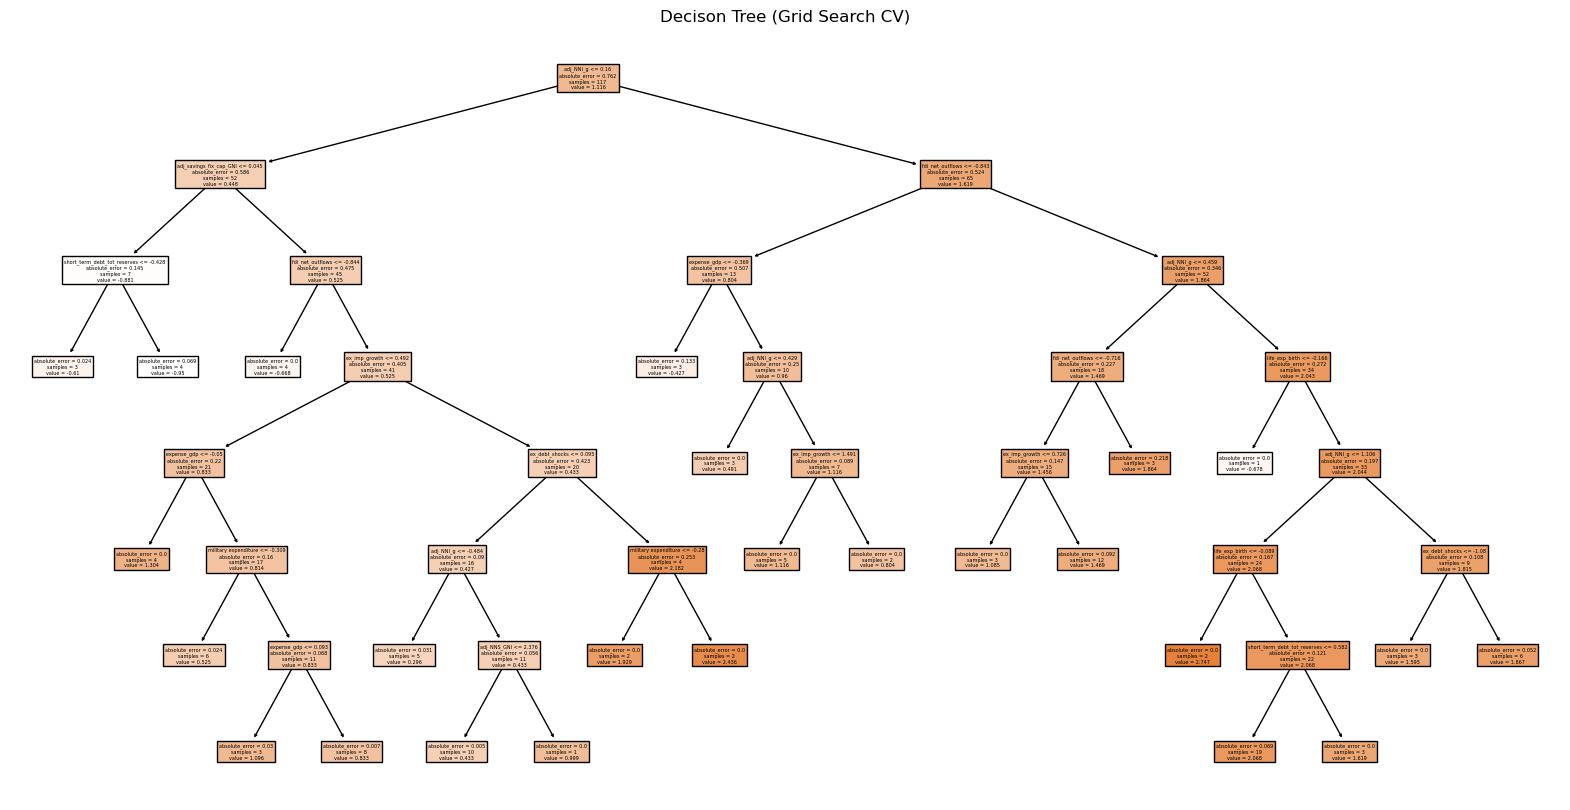

In [70]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20, 10))
plot_tree(best_dt_regressor2, filled=True, feature_names=X.columns)
plt.title('Decison Tree (Grid Search CV)')
plt.show()

Looking into the performance after Gridsearch CV, the model as usual performs really well on train but not that way on test or validation suggesting to explore more aspects of hyperparameter tuning. As decision tree is very sensitive to features, Standard Scaler was used in the initial data cleaning and preprocessing technique. 

# Decision Tree Regressor : RandomisedSearchCV

In [94]:
# setup parameter space


parameters = {'criterion':['squared_error','absolute_error'],
              'max_depth':poisson(mu=8,loc=3),
              'min_samples_split':uniform(),
              'max_leaf_nodes':poisson(mu=15,loc=5)}

r2 = RandomizedSearchCV(DecisionTreeRegressor(), parameters, cv=5, n_iter=100, random_state=42, n_jobs=-1)

r2.fit(X_train,y_train)

rgr_params2 = r2.best_params_
rgr_params2['min_samples_split'] = np.ceil(rgr_params2['min_samples_split']*X_train.shape[0])
rgr_params2

{'criterion': 'squared_error',
 'max_depth': 10,
 'max_leaf_nodes': 17,
 'min_samples_split': 7.0}

In [73]:

# updated decision tree model
dt_model = DecisionTreeRegressor(criterion='squared_error', max_depth=10, max_leaf_nodes=17, min_samples_split=7)
dt_model.fit(X_train, y_train)

# training set predictions
y_train_pred3 = dt_model.predict(X_train)

# testing set predictions
y_test_pred3 = dt_model.predict(X_test)

# validation set predictions
y_val_pred3 = dt_model.predict(X_val)

# calculating the metrics
rmse_train3, r2_train3, mse_train3, explained_var_train3 = calculate_metrics(y_train, y_train_pred3)
rmse_test3, r2_test3, mse_test3, explained_var_test3 = calculate_metrics(y_test, y_test_pred3)
rmse_val3, r2_val3, mse_val3, explained_var_val3 = calculate_metrics(y_val, y_val_pred3)

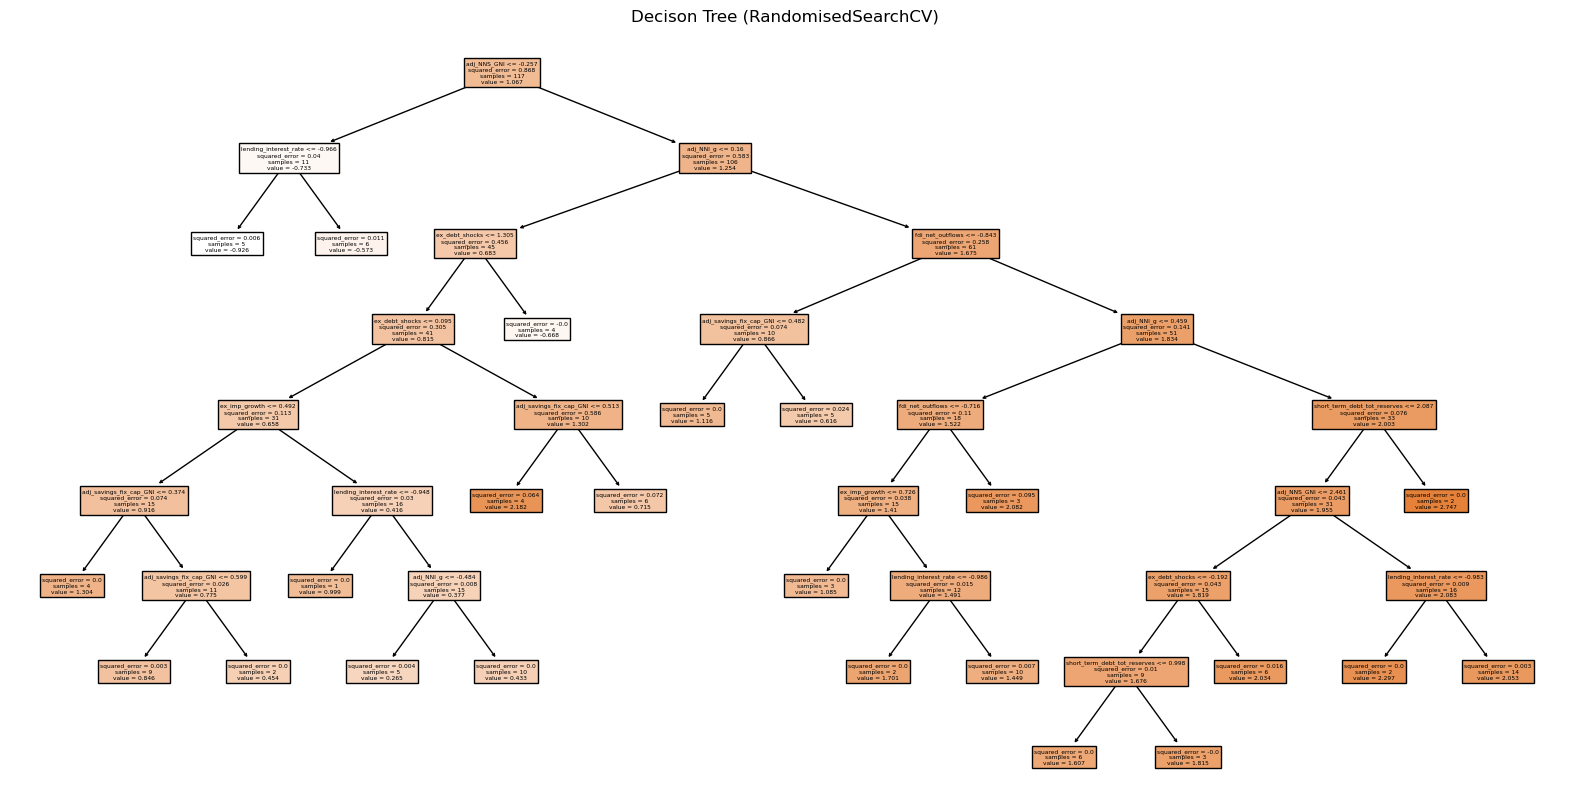

In [74]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20, 10))
plot_tree(dt_model, filled=True, feature_names=X.columns)
plt.title('Decison Tree (RandomisedSearchCV)')
plt.show()

## Results

### The Tabular Representation of the Metrics

In [103]:

headers = ["Metric", "Baseline", "GridSearchCV", "RandomisedSearchCV"]

# training set
metrics_training = [
    ["Training", "RMSE", rmse_train1, rmse_train2, rmse_train3],
    ["Training", "R2 Score", r2_train1, r2_train2, r2_train3],
    ["Training", "MSE", mse_train1, mse_train2, mse_train3],
    ["Training", "Explained Variance", explained_var_train1, explained_var_train2, explained_var_train3],
]

# testing set
metrics_test = [
    ["Test", "RMSE", rmse_test1, rmse_test2, rmse_test3],
    ["Test", "R2 Score", r2_test1, r2_test2, r2_test3],
    ["Test", "MSE", mse_test1, mse_test2, mse_test3],
    ["Test", "Explained Variance", explained_var_test1, explained_var_test2, explained_var_test3],
]

# validation set
metrics_validation = [
    ["Validation", "RMSE", rmse_val1, rmse_val2, rmse_val3],
    ["Validation", "R2 Score", r2_val1, r2_val2, r2_val3],
    ["Validation", "MSE", mse_val1, mse_val2, mse_val3],
    ["Validation", "Explained Variance", explained_var_val1, explained_var_val2, explained_var_val3],
]

# all metrics
combined= metrics_training + metrics_test + metrics_validation
table_combined = [headers] + metrics_training + metrics_test + metrics_validation
table1 = tabulate(table_combined, headers="firstrow", tablefmt="fancy_grid")

print(table1)



╒════════════╤════════════════════╤══════════════╤════════════════╤══════════════════════╕
│            │ Metric             │     Baseline │   GridSearchCV │   RandomisedSearchCV │
╞════════════╪════════════════════╪══════════════╪════════════════╪══════════════════════╡
│ Training   │ RMSE               │   5.8062e-17 │      0.0940319 │            0.111146  │
├────────────┼────────────────────┼──────────────┼────────────────┼──────────────────────┤
│ Training   │ R2 Score           │ 100          │     98.9811    │           98.5765    │
├────────────┼────────────────────┼──────────────┼────────────────┼──────────────────────┤
│ Training   │ MSE                │   3.3712e-33 │      0.008842  │            0.0123535 │
├────────────┼────────────────────┼──────────────┼────────────────┼──────────────────────┤
│ Training   │ Explained Variance │ 100          │     98.983     │           98.5765    │
├────────────┼────────────────────┼──────────────┼────────────────┼──────────────────────┤

### Discussion

When you look at the performance of the training, testing and validation set in terms of the baseline decision tree, the GridSearchCV tree and the RandomisedSearchCV set, we see that the baseline decision tree has overfit a lot despite the testing and the validation of the baseline decision tree performing well. If you look at the GridSearchCV, the performance overall is lesser than baseline but the RMSE between trainng and testing for GridSearchCV is lesser, showcasing that the hyperparameter tuning has looked into overfitting. The best performing for me personally is the RandomisedSearchCV as it looks the overfitting by a lot more as the difference between the training, testing and validation RMSE's is lesser in comparision. The R2 score is higher out of all under training, testing and validation for RandomisedSearchCV. Hence, the RandomisedSearchCV performs the best.

# Random Forest Regressor 

Random Forest is an ensemble learning method that works by training a large number of decision trees and then calculating the mean prediction (regression) of the individual trees. It creates a "forest" of trees by training each tree on a different part of the data and utilising a different selection of characteristics for each split. The model's randomness decreases overfitting and enhances generalisation, making it more dependable than decision trees. It differs from a single decision tree in that Random Forest overcomes some of its limitations. While decision trees are prone to overfitting, especially on complex datasets, Random Forest mitigates this by injecting randomization into the model, which provides superior generalisation to unseen data and is not susceptible to outliers. We use Random Forest Regressor here.


In [77]:
baseline_rf = RandomForestRegressor(random_state=42)
baseline_rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [78]:
# predictions on training set
y_train_pred_rf = baseline_rf.predict(X_train)

# predictions on testing set
y_test_pred_rf = baseline_rf.predict(X_test)

# predictions on validation set
y_val_pred_rf = baseline_rf.predict(X_val)

In [79]:
# calculating metrics
rmse_train4, r2_train4, mse_train4, explained_var_train4 = calculate_metrics(y_train, y_train_pred_rf)
rmse_test4, r2_test4, mse_test4, explained_var_test4 = calculate_metrics(y_test, y_test_pred_rf)
rmse_val4, r2_val4, mse_val4, explained_var_val4 = calculate_metrics(y_val, y_val_pred_rf)

In [80]:
len(baseline_rf.estimators_)

100

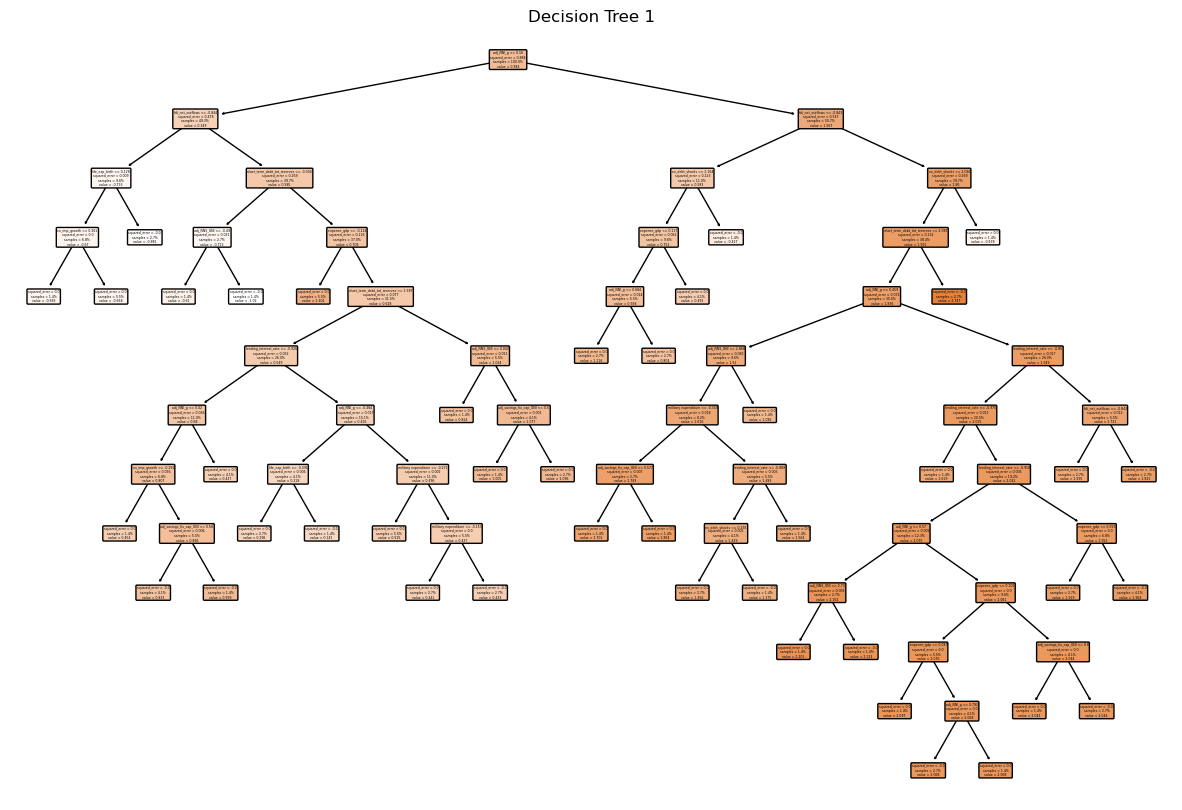

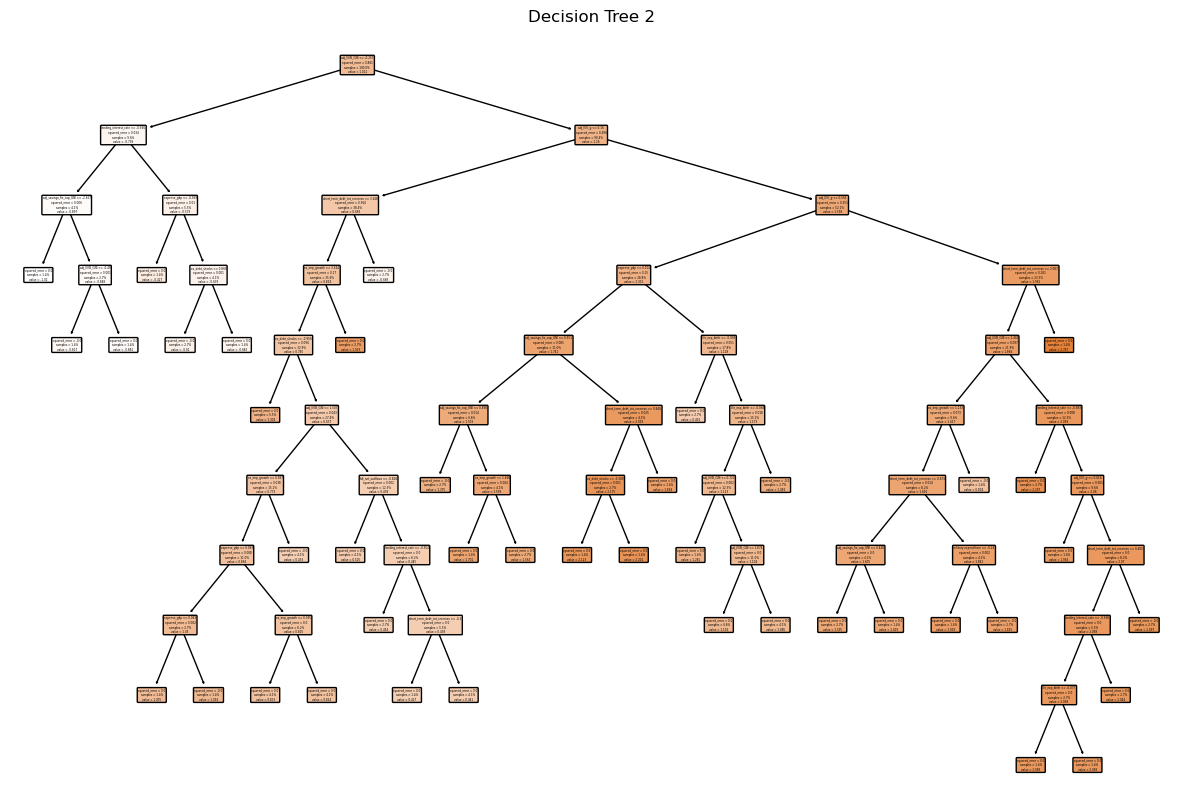

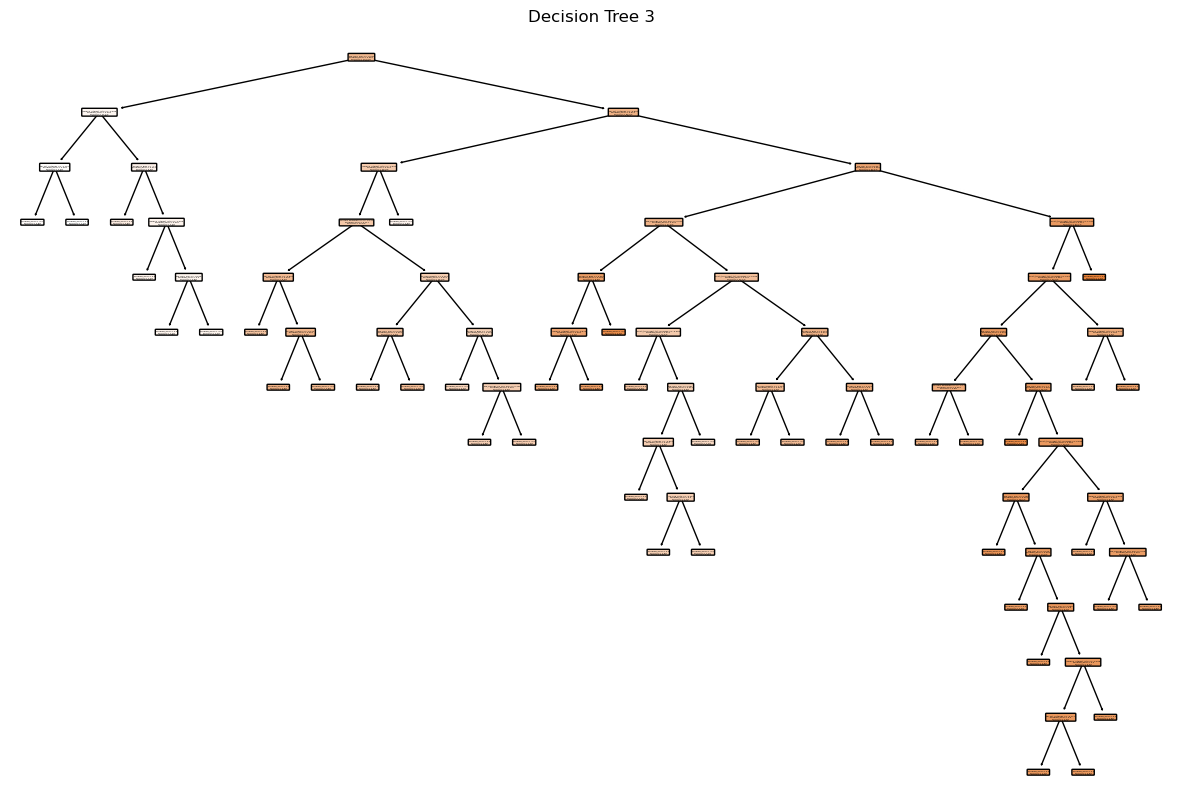

In [81]:
for i in range(3):
    tree = baseline_rf.estimators_[i]

    # Plot the tree
    plt.figure(figsize=(15, 10))
    plot_tree(tree, filled=True, feature_names=X_train.columns, class_names=['0', '1'], rounded=True, proportion=True)
    plt.title(f'Decision Tree {i + 1}')
    plt.show()

The following is the tree for the random forest without any hyperparameter tuning.

## Random Forest : GridSearchCV Method

In [82]:
parameters = {
    'n_estimators': [100, 150, 200, 250, 300],
    'max_depth': [1, 2, 3, 4, 5, 6, 7, 8],
    'min_samples_split': [2, 3, 4, 5, 6],
}

regr = RandomForestRegressor(random_state=80)

clf = GridSearchCV(regr, parameters, error_score='raise')
clf.fit(X_train, y_train)

print("Best Parameters:", clf.best_params_)
print("Best Score:", clf.best_score_)


Best Parameters: {'max_depth': 8, 'min_samples_split': 2, 'n_estimators': 250}
Best Score: 0.8735751920102682


In [83]:
best_rf_model = RandomForestRegressor(
    max_depth=8,
    min_samples_split=2,
    n_estimators=250,
    random_state=80
)

best_rf_model.fit(X_train, y_train)


RandomForestRegressor(max_depth=8, n_estimators=250, random_state=80)

In [84]:
# predictions on the training set
y_train_pred_rf2 = best_rf_model.predict(X_train)

# predictions on the test set
y_test_pred_rf2 = best_rf_model.predict(X_test)

# predictions on the validation set  
y_val_pred_rf2 = best_rf_model.predict(X_val)

In [85]:
# calculating metrics 
rmse_train5, r2_train5, mse_train5, explained_var_train5 = calculate_metrics(y_train, y_train_pred_rf2)
rmse_test5, r2_test5, mse_test5, explained_var_test5 = calculate_metrics(y_test, y_test_pred_rf2)
rmse_val5, r2_val5, mse_val5, explained_var_val5 = calculate_metrics(y_val, y_val_pred_rf2)

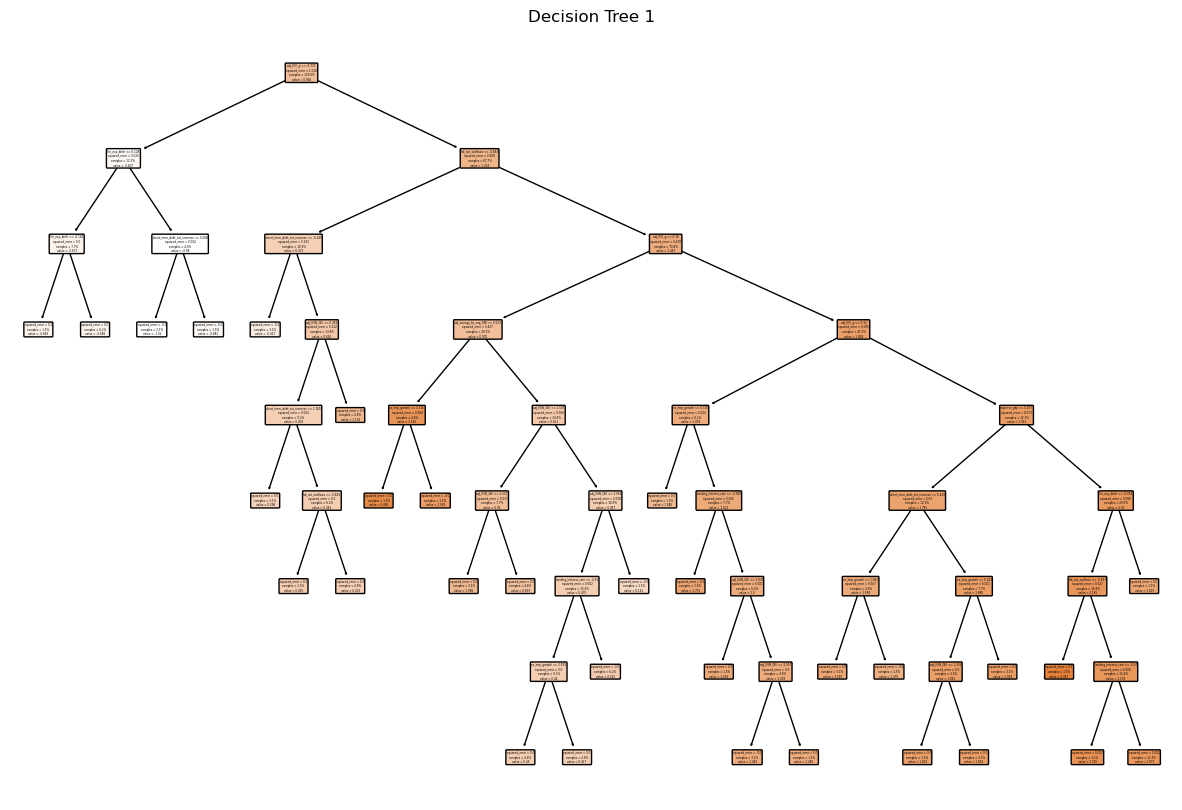

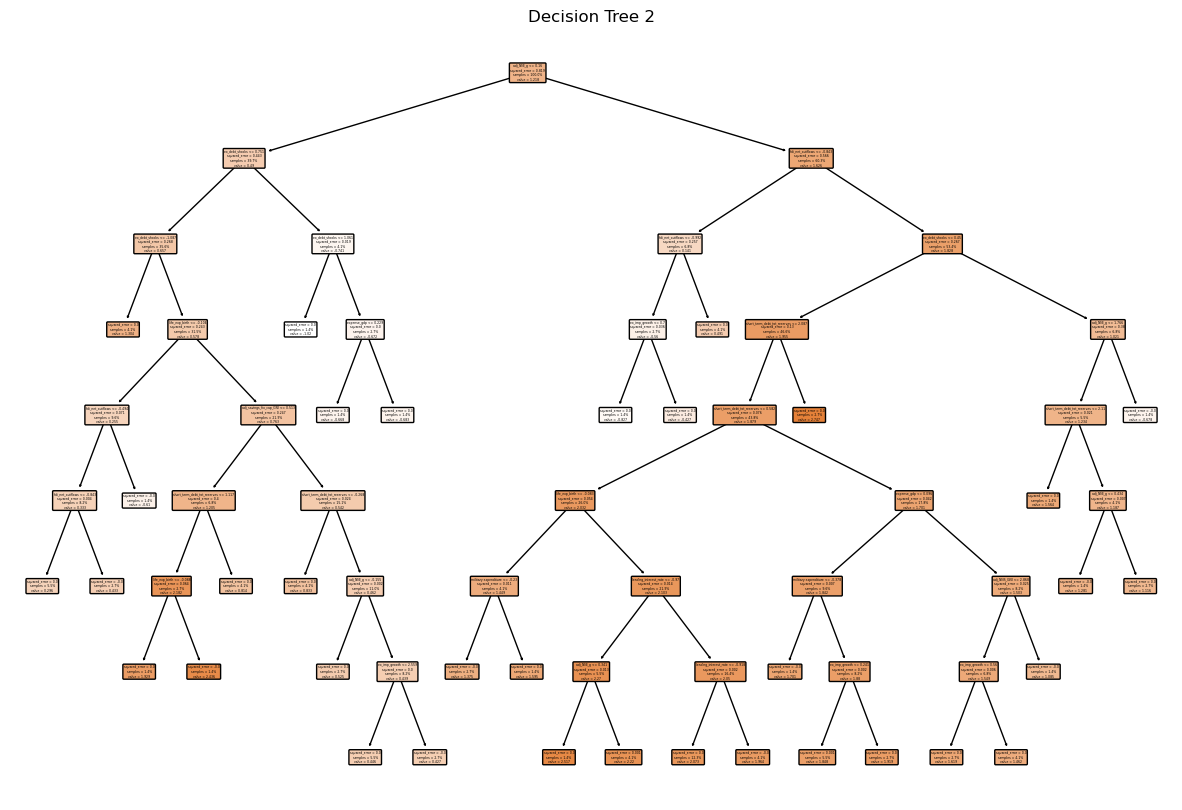

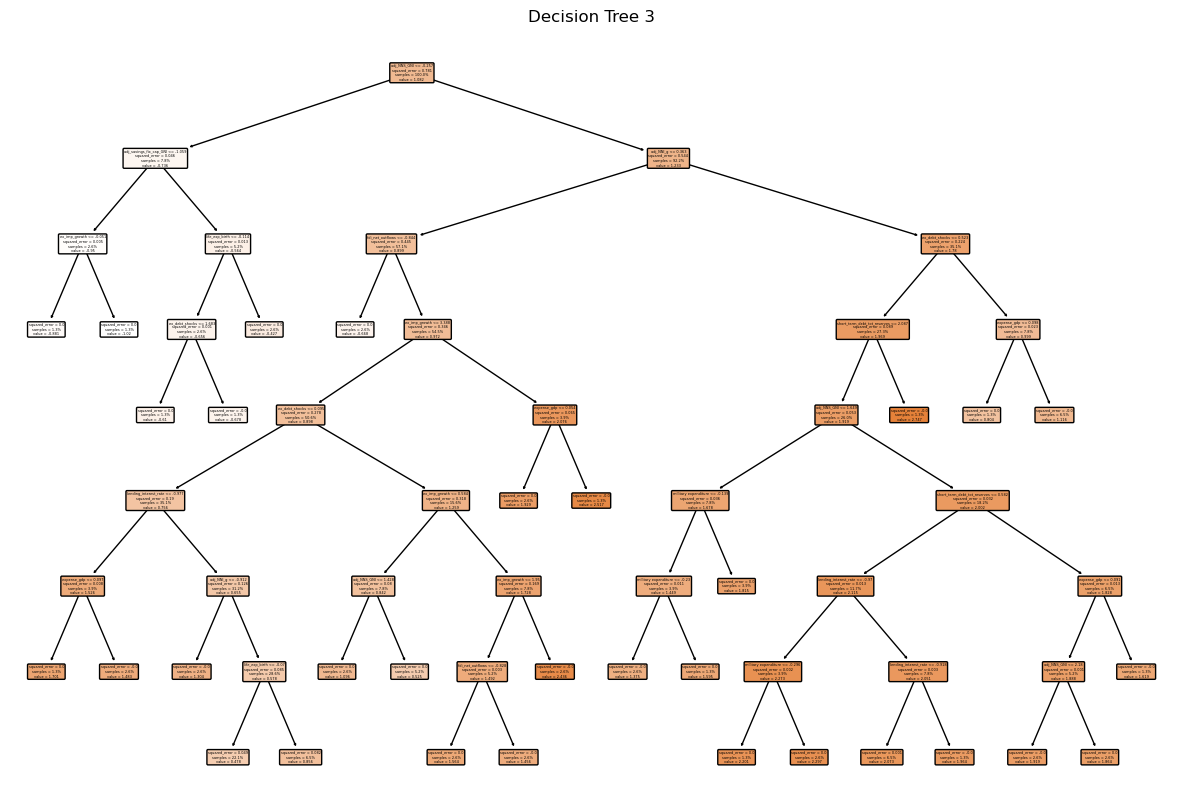

In [86]:
for i in range(3):
    tree = best_rf_model.estimators_[i]

    # Plot the tree
    plt.figure(figsize=(15, 10))
    plot_tree(tree, filled=True, feature_names=X_train.columns, class_names=['0', '1'], rounded=True, proportion=True)
    plt.title(f'Decision Tree {i + 1}')
    plt.show()

Here we see that the trees have been more pruned.

### Results 

### The Tabular Representation of the Metrics

In [107]:

headers = ["Metric", "Baseline", "GridSearchCV"]

# training set
metrics_training2 = [
    ["Training", "RMSE", rmse_train4, rmse_train5],
    ["Training", "R2 Score", r2_train4, r2_train5],
    ["Training", "MSE", mse_train4, mse_train5],
    ["Training", "Explained Variance", explained_var_train4, explained_var_train5],
]

# testing set
metrics_test2 = [
    ["Test", "RMSE", rmse_test4, rmse_test5],
    ["Test", "R2 Score", r2_test4, r2_test5],
    ["Test", "MSE", mse_test4, mse_test5],
    ["Test", "Explained Variance", explained_var_test4, explained_var_test5],
]

# validation set 
metrics_validation2 = [
    ["Validation", "RMSE", rmse_val4, rmse_val5],
    ["Validation", "R2 Score", r2_val4, r2_val5],
    ["Validation", "MSE", mse_val4, mse_val5],
    ["Validation", "Explained Variance", explained_var_val4, explained_var_val5],
]

# all
table_combined = [headers] + metrics_training2 + metrics_test2 + metrics_validation2
table2 = tabulate(table_combined, headers="firstrow", tablefmt="fancy_grid")
print(table2)





╒════════════╤════════════════════╤════════════╤═══════════════╕
│            │ Metric             │   Baseline │   Grid Search │
╞════════════╪════════════════════╪════════════╪═══════════════╡
│ Training   │ RMSE               │  0.10223   │      0.102044 │
├────────────┼────────────────────┼────────────┼───────────────┤
│ Training   │ R2 Score           │ 98.7957    │     98.8001   │
├────────────┼────────────────────┼────────────┼───────────────┤
│ Training   │ MSE                │  0.0104509 │      0.010413 │
├────────────┼────────────────────┼────────────┼───────────────┤
│ Training   │ Explained Variance │ 98.8034    │     98.81     │
├────────────┼────────────────────┼────────────┼───────────────┤
│ Test       │ RMSE               │  0.683789  │      0.670609 │
├────────────┼────────────────────┼────────────┼───────────────┤
│ Test       │ R2 Score           │ 55.7101    │     57.4011   │
├────────────┼────────────────────┼────────────┼───────────────┤
│ Test       │ MSE       

### Discussion

Decision Tree: 

On training, testing, and validation sets, the decision tree model's performance is assessed using a variety of metrics, such as Root Mean Squared Error (RMSE), R2 Score, Mean Squared Error (MSE), and Explained Variance. The decision tree shows remarkable results when compared to the baseline model; it achieves almost zero RMSE on the training set, indicating a very good fit. The training data exhibits a high degree of explained variance, as indicated by an R2 Score that is nearly 100%. On the other hand, the model shows somewhat higher RMSE values and lower R2 Scores on the testing and validation sets, suggesting a moderate decline in performance on unseen data. Hyperparameter tuning techniques for GridSearchCV and RandomisedSearchCV show slight improvements over the initial version, with RandomisedSearchCV outperforming GridSearchCV.

Random Forest: 

Across training, testing, and validation sets, the Random Forest model's performance is assessed using important metrics such as Root Mean Squared Error (RMSE), R2 Score, Mean Squared Error (MSE), and Explained Variance.The Random Forest model shows significant improvements over the baseline model, with lower RMSE values, higher R2 Scores, and reduced MSE. These results suggest improved predictive accuracy and better fit to the data. The high R2 Score and low RMSE of the training set results demonstrate the model's ability to capture the underlying patterns.The model's ability to generalise is demonstrated by these encouraging trends, which hold true for the testing and validation sets. All metrics show slight improvements from the baseline when Grid Search hyperparameters are tuned. For this regression task, the Random Forest model is a dependable option due to its overall strong predictive performance.

## Conclusion

In conclusion, I can say that hyperparameter tuning actually helps with the model and random forest performs the best in comparison the decision tree model. When we look in terms of Decision Tree, hyperparameter tuning with RandomisedSearchCV performs the best in reducing the overfitting and in terms of Random Forest, hyperparameter tuning with GridSearchCV performs the best and overall as well. 

However, there is still a lot of overfitting. If time permits, I would look into the nature of the data and explore it in terms of the time series perspective to reduce autocorrelation and look into more overfitting techniques like L1 and L2 regularization techniques.

# Sources

1. Maverick, AL. (2021). Evaluate the Decision Regressor Tree. Medium. https://samanemami.medium.com/evaluate-the-decision-regressor-tree-d8394d753ae7
2. Inside Learning Machines. (n.d.). Tune Hyperparameters in Decision Trees. https://insidelearningmachines.com/tune_hyperparameters_in_decision_trees/
3. Climent, C. (n.d.). Random Forest Regressor and GridSearch. Kaggle. https://www.kaggle.com/code/carloscliment/random-forest-regressor-and-gridsearch
4. scikit-learn. (n.d.). RandomizedSearchCV. https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html
5. Stack Overflow. (2018). Random Forest tuning with RandomizedSearchCV. https://stackoverflow.com/questions/53782169/random-forest-tuning-with-randomizedsearchcv
6. Banerjee, A. (2022). Hyperparameter Tuning using Randomized Search. https://www.analyticsvidhya.com/blog/2022/11/hyperparameter-tuning-using-randomized-search/
7. scikit-learn. (n.d.). GridSearchCV. https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
8. scikit-learn. (n.d.). RandomForestRegressor. https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html
9. scikit-learn. (n.d.). DecisionTreeRegressor. https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html
10. PyPI. (n.d.). tabulate. https://pypi.org/project/tabulate/
11. PyPI. (n.d.). treeplot. https://pypi.org/project/treeplot/
